In [15]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def CCG_calc(seq):
    leng = len(seq)
    


In [14]:
leng = 0
C_G = 0
for seq in SeqIO.parse(open('../../data/sequences_annotation/1448933.3.contigs.fa'), 'fasta'):
    C_G += (seq.seq.count('c') + seq.seq.count('g'))
    leng += len(seq.seq)
    print(C_G/leng*100, leng)

53.63163342378381 1429880


In [11]:
leng = 0
C_G = 0
for seq in SeqIO.parse(open('../../3817-70/data/sequence_annotation/1448933.6.contigs.fa'), 'fasta'):
    C_G += (seq.seq.count('c') + seq.seq.count('g'))
    leng += len(seq.seq)
print(C_G/leng*100)

51.885016307731945


In [18]:
leng = 0
for seq in SeqIO.parse(open('../../3817-70/data/sequence_annotation/1448933.6.contigs.fa'), 'fasta'):
    leng += len(seq.seq)
print(leng)

1498369


In [5]:
def CG_cont(lis:str) -> float:
    lis = lis.upper()
    GC = lis.count('G') + lis.count('C')
    return GC/len(lis)

def CG_skew(lis:str) -> float:
    lis = lis.upper()
    G = lis.count('G')
    C = lis.count('C')
    return (G - C)/(G + C)

In [6]:
def slider(seq,sliding_window, step_size):
    #sliding_window = 1000
    step = 0
    #step_size = 1000
    r_bords = []
    GCskew = []
    #GCcont = []
    l_bords = []
    for i in range(0,len(seq)):

        l_bord = step
        r_bord = sliding_window + l_bord
        step += step_size
        window = seq[l_bord:r_bord]

        l_bords.append(l_bord+1)
        r_bords.append(r_bord-sliding_window+1)
        GCskew.append(CG_skew(window))
        #GCcont.append(CG_cont(window))

        if r_bord >= len(seq):
            break

    GCskew.append((GCskew[0] + GCskew[-1])/2) #Замыкание кольца гистограммы
    #GCcont.append((GCcont[0] + GCcont[-1])/2)
    l_bords.append(l_bords[-1] + sliding_window-step_size )
    r_bords.append(r_bords[-1]  + sliding_window )
    return list(zip(l_bords,r_bords,GCskew))

## GC-skew graph

In [43]:
for seq in SeqIO.parse(open('/home/aster/Project_Geoarchaeota_28.11/data/sequences_annotation/1448933.3.contigs.fa'), 'fasta'):
    lst = slider(seq.seq, sliding_window=1000, step_size=10)


In [44]:
df = pd.DataFrame({0:[i[0] for i in lst], 1:[i[2] for i in lst]})

In [56]:
df.sort_values(by=1)

,0,1
65819,658191,-0.302326
65820,658201,-0.301075
8104,81041,-0.300178
65821,658211,-0.300000
65822,658221,-0.298748
...,...,...
127293,1272931,0.382504
127289,1272891,0.382504
127292,1272921,0.383305
127290,1272901,0.383821


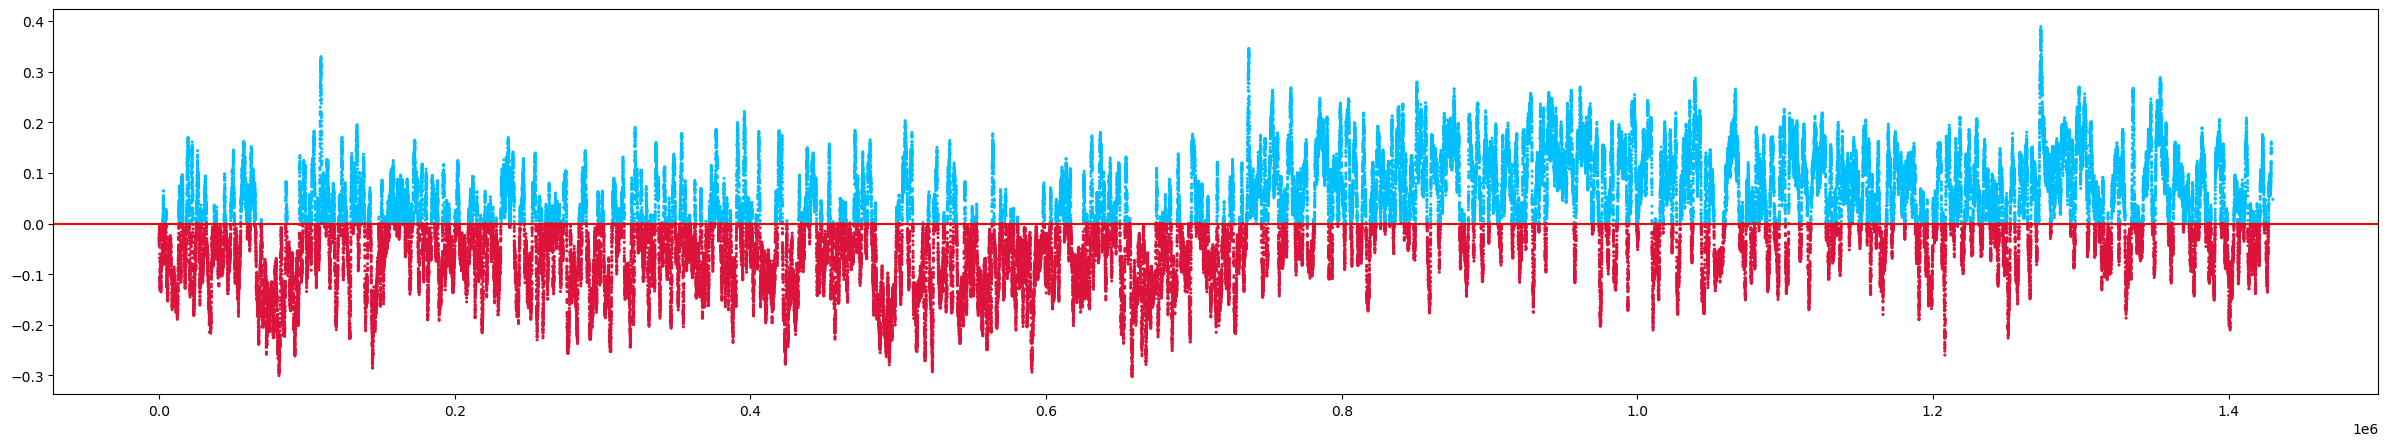

In [49]:
plt.figure(figsize=(30,5))
plt.scatter(df[0], df[1], color=np.where(df[1] > 0, 'deepskyblue', 'crimson'), s=5, edgecolor='none')
#plt.plot(df[0], df[1])
plt.axhline(0, color='red')